# PERSONALIZED BREAK TIMER

  

#ENES TAHA ELMACİ 21990872
#MELİH MERAL 21946438

Abstract of the project comes here.

## Table of Content

[Problem](#problem)   
[Data Understanding](#data_understanding)   
[Data Preparation](#data_preparation)   
[Modeling](#modeling)   
[Evaluation](#evaluation)   
[References](#references)   


## Problem <a class="anchor" id="problem"></a>

We will get the datas of person from his/her smart  watches. With the help of these data, we will make a efficient workers.Our goal is if a person.Our goal is to determine whether or not they are tired according to the data we receive from smart watches used by working people.

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression,LinearRegression
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sn
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values, get_time_domain_features, get_frequency_domain_features, get_nn_intervals
from sklearn.ensemble import RandomForestClassifier

import model
import datetime as dt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


## Data Understanding<a class="anchor" id="data_understanding"></a>

In [40]:
HRVanalysis = pd.read_csv("drowsiness-data.csv", delimiter=',')


hrv_datas = pd.get_dummies(HRVanalysis, drop_first=True)


df = pd.DataFrame(hrv_datas)
df = pd.DataFrame(df, columns=hrv_datas.columns)

df.head(10)

,lf,hf,lf_hf_ratio,lfnu,hfnu,total_power,vlf,drowsiness,mean_nni,sdnn,...,pnni_20,rmssd,median_nni,range_nni,cvsd,cvnni,mean_hr,max_hr,min_hr,std_hr
0,303.570965,146.920973,2.066219,67.386548,32.613452,663.333967,212.842029,0,649.957447,26.560806,...,21.739130,16.814202,645.0,122,0.025870,0.040865,92.462208,100.000000,83.102493,3.678133
1,1618.058276,105.157974,15.386929,93.897575,6.102425,2011.769957,288.553708,0,620.974359,45.953951,...,25.974026,23.055833,618.0,191,0.037128,0.074003,97.132519,111.111111,82.079343,6.959793
2,4810.671986,24016.948957,0.200303,16.687718,83.312282,29374.748281,547.127339,1,603.065217,189.193775,...,93.333333,266.062232,512.5,743,0.441183,0.313720,108.464951,194.174757,57.034221,30.654349
3,63.300281,36.471925,1.735589,63.444804,36.555196,141.185611,41.413405,0,634.156863,21.121906,...,34.000000,29.356771,638.0,105,0.046293,0.033307,94.717189,104.166667,88.105727,3.138425
4,400.020030,99.116170,4.035871,80.142460,19.857540,577.111142,77.974942,0,762.129032,41.251521,...,45.901639,29.123254,750.0,214,0.038213,0.054127,78.945159,88.105727,67.039106,4.080775
5,629.501726,221.738862,2.838933,73.951094,26.048906,1134.457395,283.216806,0,689.185185,39.116697,...,35.849057,35.412928,689.0,164,0.051384,0.056758,87.331892,96.000000,76.045627,4.858451
6,154.381102,148.326017,1.040823,51.000156,48.999844,351.717960,49.010841,1,727.970588,27.813759,...,24.242424,21.524475,731.0,120,0.029568,0.038207,82.541356,91.047041,77.021823,3.204490
7,1599.280123,3191.132397,0.501164,33.385019,66.614981,4864.536356,74.123837,1,715.764706,58.954993,...,56.250000,55.145263,722.0,203,0.077044,0.082366,84.372683,97.087379,73.081608,6.868828
8,180.159304,51.929150,3.469329,77.625276,22.374724,244.919253,12.830800,0,663.428571,24.111513,...,25.925926,20.297783,666.0,116,0.030595,0.036344,90.555135,99.009901,83.102493,3.251709
9,577.341150,397.876215,1.451057,59.201279,40.798721,2151.988418,1176.771053,0,652.514706,71.400383,...,37.313433,31.220927,645.0,276,0.047847,0.109423,93.008819,110.091743,73.081608,9.793917


We got our data sets from smart watches (apple watch). We used hrv values from data from smart watches and bpm values used to calculate hrv. We created our data set by taking the indices of these values (lf, hf etc.).

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lf           2993 non-null   float64
 1   hf           2993 non-null   float64
 2   lf_hf_ratio  2993 non-null   float64
 3   lfnu         2993 non-null   float64
 4   hfnu         2993 non-null   float64
 5   total_power  2993 non-null   float64
 6   vlf          2993 non-null   float64
 7   drowsiness   2993 non-null   int64  
 8   mean_nni     2993 non-null   float64
 9   sdnn         2993 non-null   float64
 10  sdsd         2993 non-null   float64
 11  nni_50       2993 non-null   int64  
 12  pnni_50      2993 non-null   float64
 13  nni_20       2993 non-null   int64  
 14  pnni_20      2993 non-null   float64
 15  rmssd        2993 non-null   float64
 16  median_nni   2993 non-null   float64
 17  range_nni    2993 non-null   int64  
 18  cvsd         2993 non-null   float64
 19  cvnni 

## Data Preparation<a class="anchor" id="data_preparation"></a>

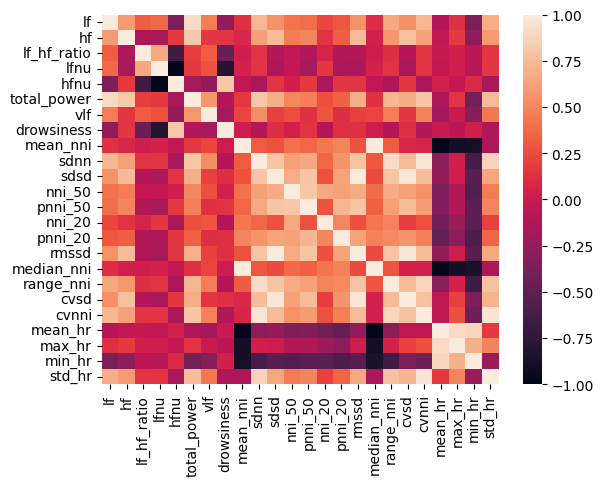

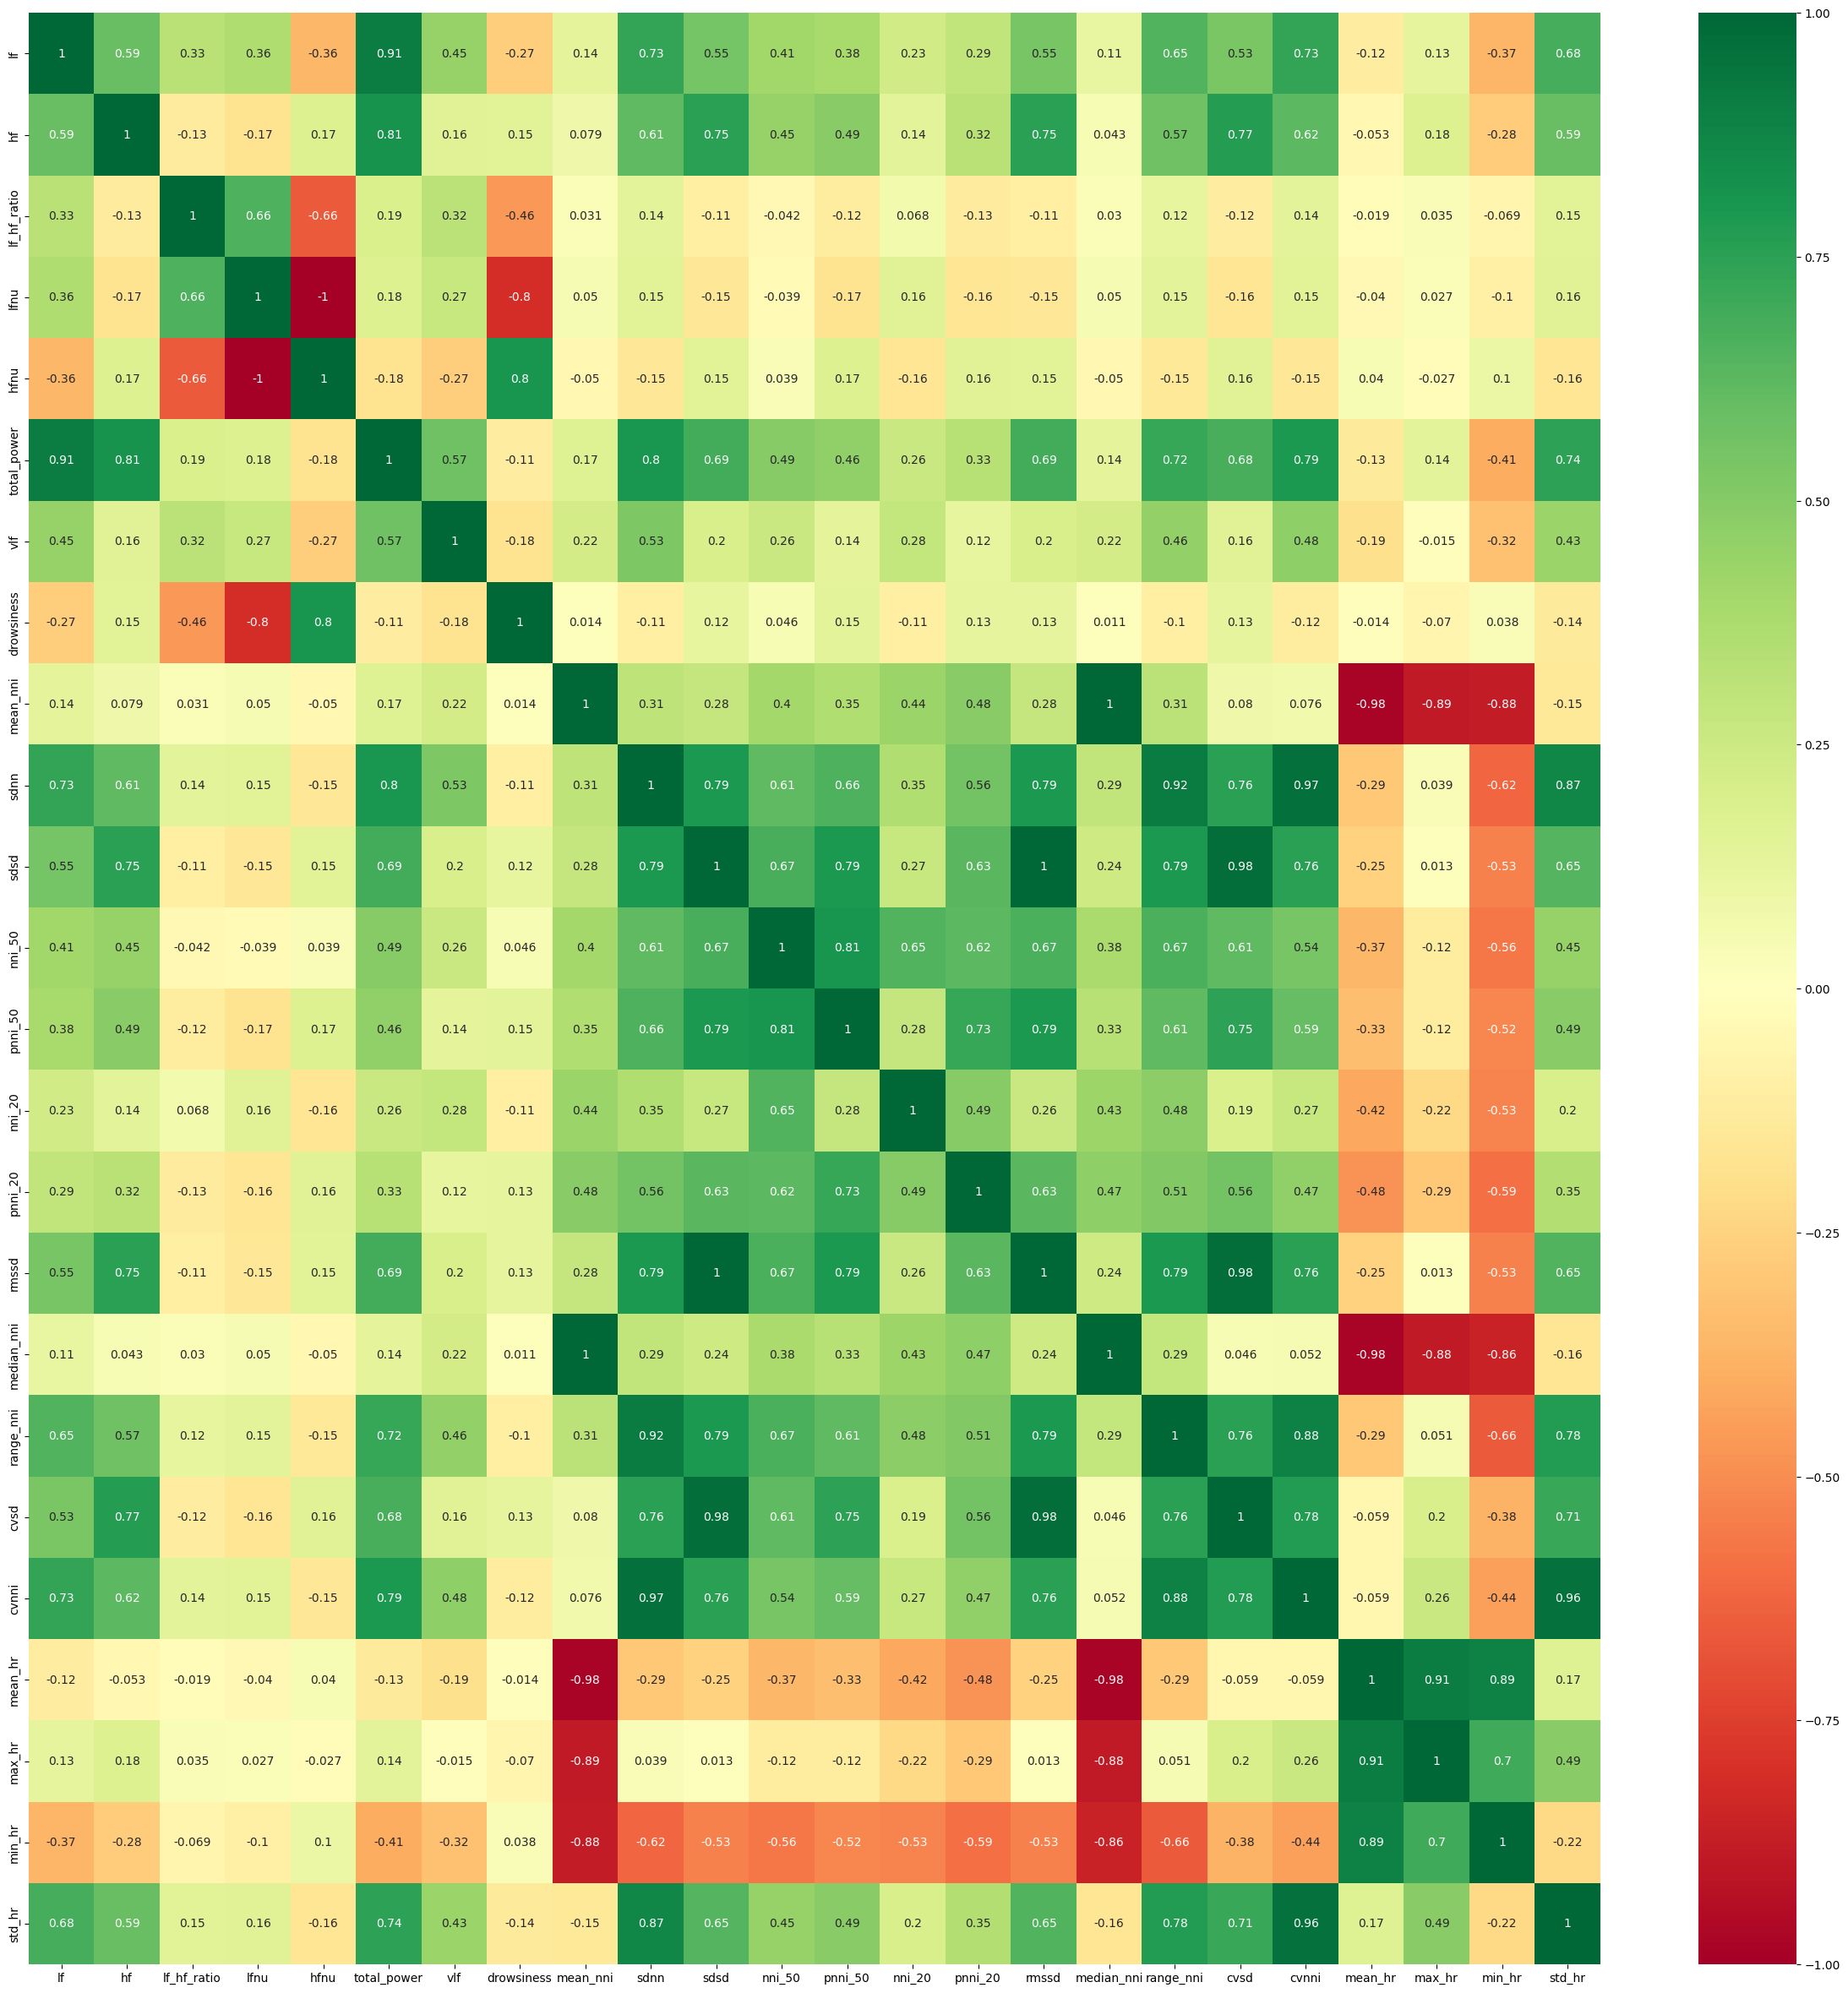

In [42]:

corr = df.corr()
sn.heatmap(corr)


top__corr_features = corr.index
plt.figure(figsize=(30, 30))
g = sn.heatmap(df[top__corr_features].corr(), annot=True, cmap="RdYlGn")

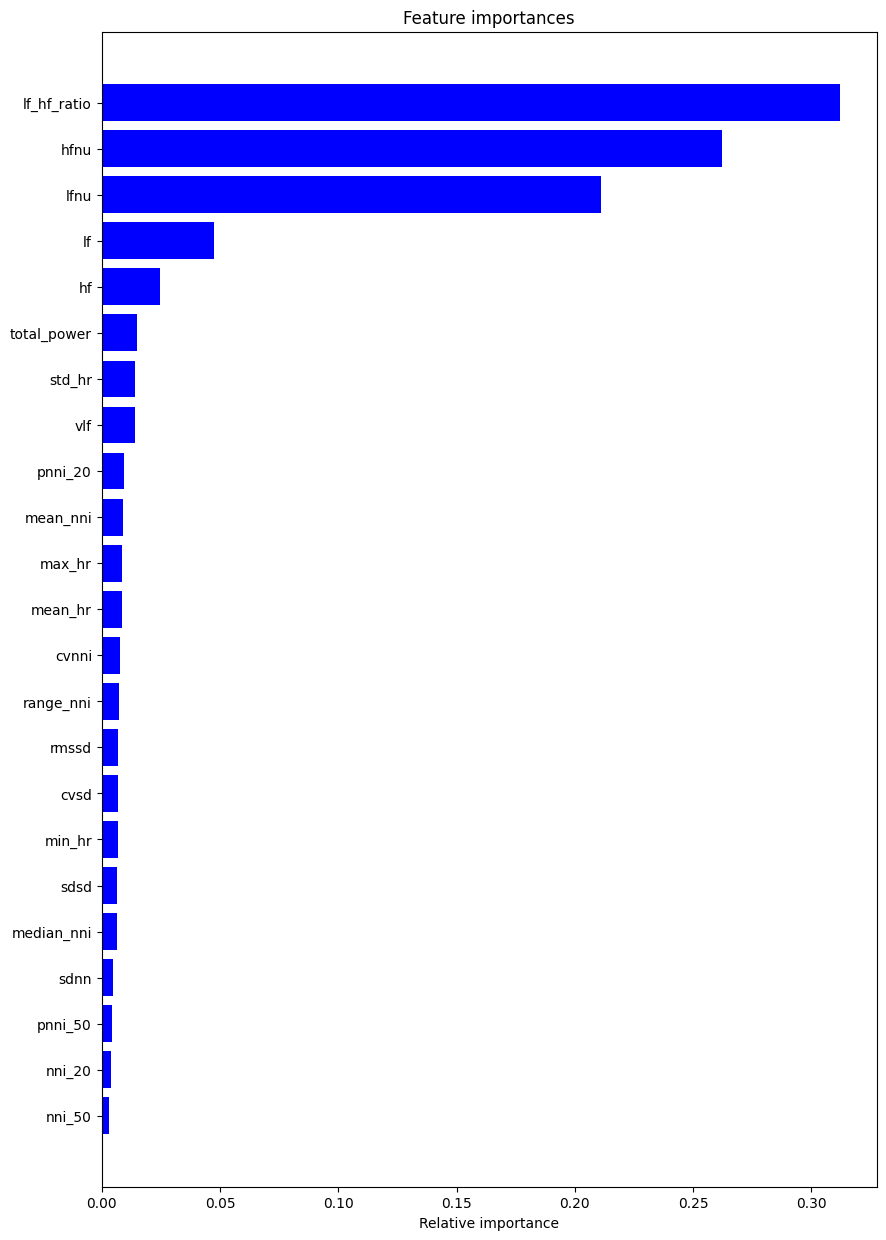

In [43]:
X = HRVanalysis.drop(["drowsiness"], axis=1).values
y = HRVanalysis["drowsiness"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)
ourmodel = RandomForestClassifier()

ourmodel.fit(X_train, y_train)

features= HRVanalysis.drop(["drowsiness"], axis=1).columns
importances = ourmodel.feature_importances_
indices=np.argsort(importances)

plt.figure(figsize=(10,15))
plt.title("Feature importances")
plt.barh(range(len(indices)),importances[indices],color="b",align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance")
plt.show()

We check the null values but there is no null values in our data as we can see. For the drowsiness column, the labeling was done according to the measurements when user feels fatigue or feels fresh. We selected the features we used while training our model according to the table above and trained our model accordingly.

## Modeling<a class="anchor" id="modeling"></a>

In [44]:
features_selected=["drowsiness","lfnu","hfnu","lf_hf_ratio","lf"]
df_with_selected_features=df[features_selected]
X_train, X_test, y_train, y_test = train_test_split(df_with_selected_features.drop('drowsiness', axis=1), df_with_selected_features['drowsiness'], test_size=0.20, random_state=0)

In [45]:
df_with_selected_features.columns

Index(['drowsiness', 'lfnu', 'hfnu', 'lf_hf_ratio', 'lf'], dtype='object')

In [46]:
df_with_selected_features.shape


(2993, 5)

In [47]:

logistig_model = LogisticRegression()
logistig_model.fit(X_train, y_train)
print(logistig_model.score(X_test, y_test))
y_pred = logistig_model.predict(X_test)


0.9682804674457429


In [48]:
confusion_matrix(y_test,y_pred)

array([[330,  11],
       [  8, 250]], dtype=int64)

c:\Users\enes\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


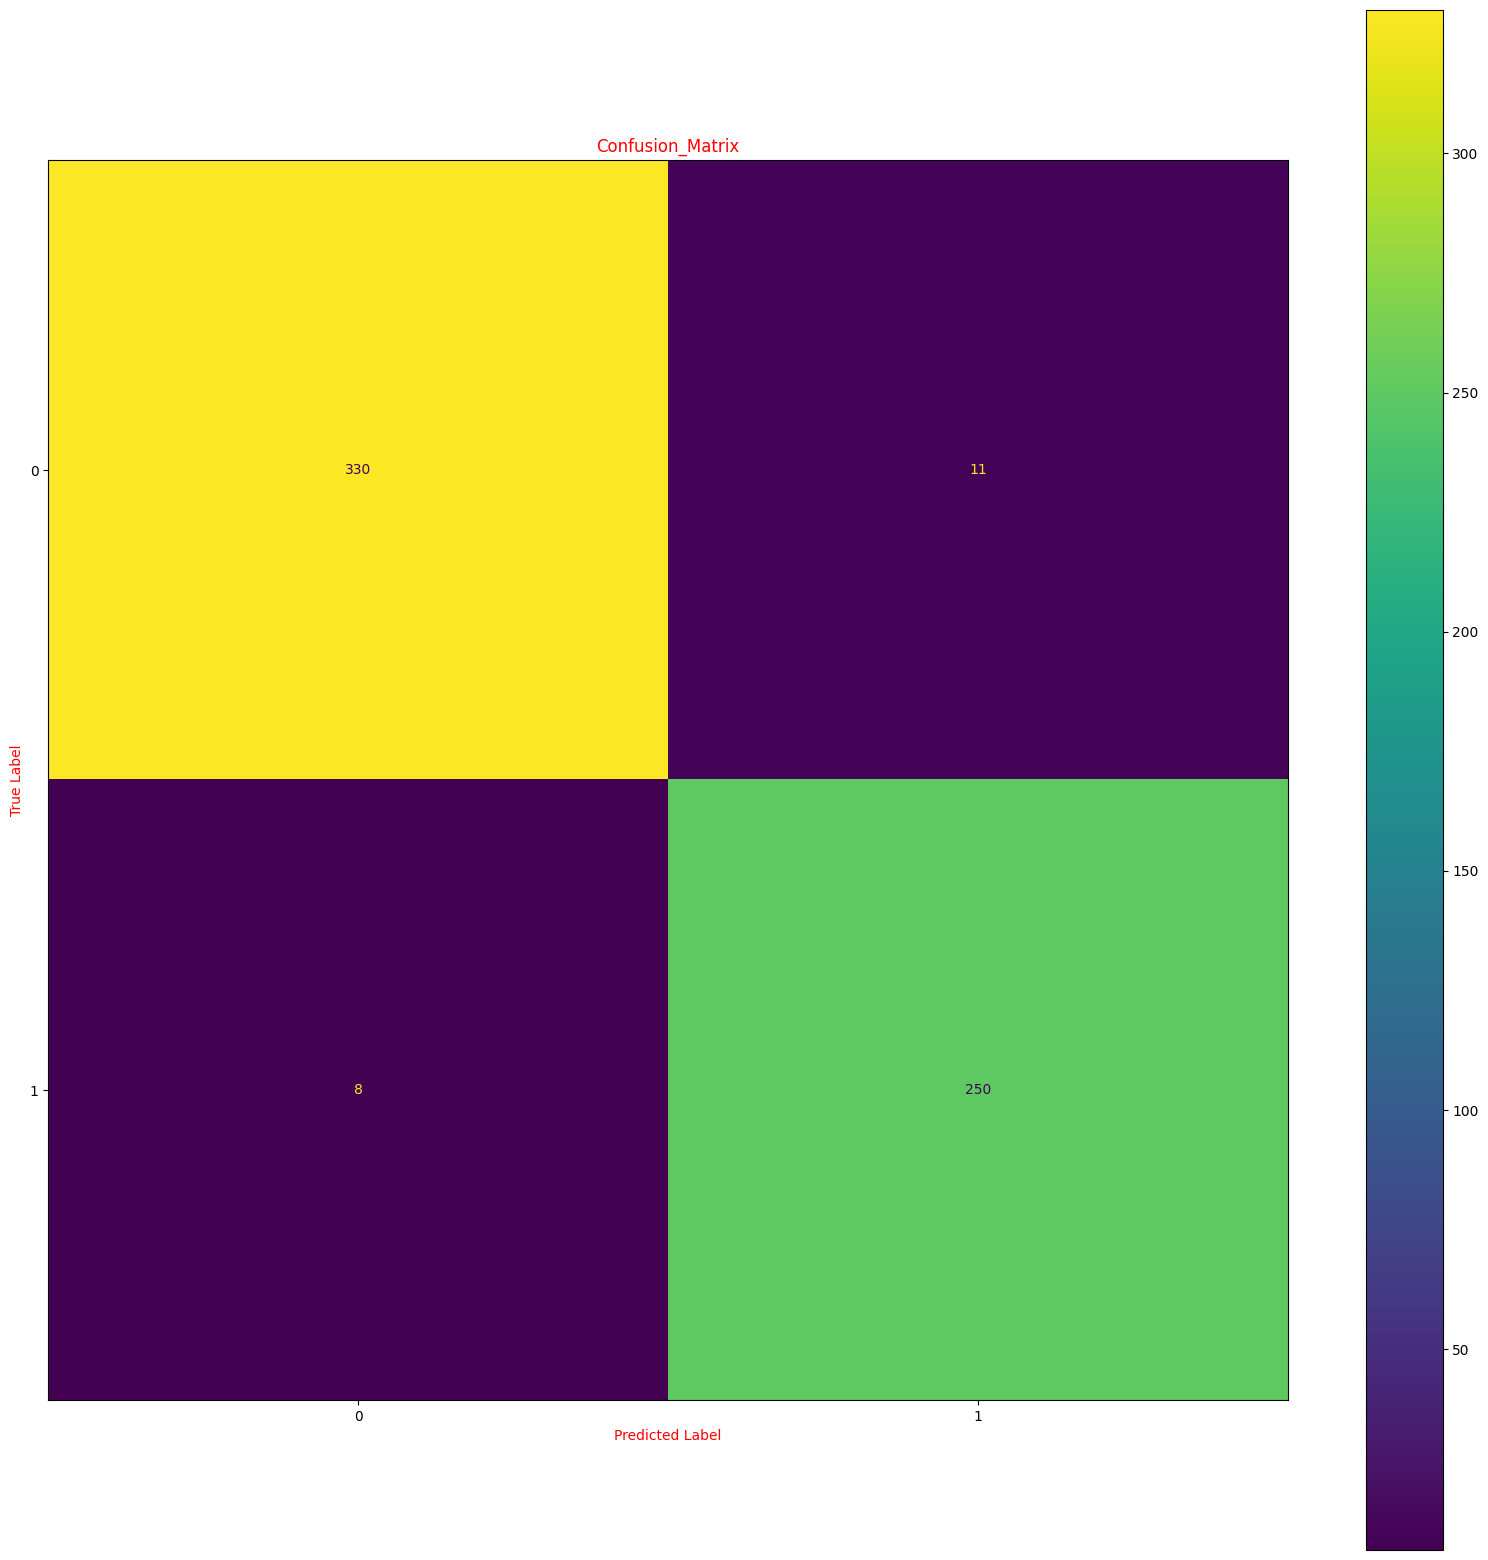

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

matrix = plot_confusion_matrix(logistig_model,X_test,y_test)
matrix.ax_.set_title('Confusion_Matrix',color = 'red')
plt.xlabel('Predicted Label',color = 'red')
plt.ylabel('True Label',color = 'red')
plt.gcf().axes[0].tick_params(colors = 'black')
plt.gcf().axes[1].tick_params(colors = 'black')
plt.gcf().set_size_inches(20,20)
plt.show()


330 of the test datas' drowsiness are labeled as user is not tired and 250 are labeled as tired and predicted correctly. However, 8 of the datas' that are labeled as user not tired and 11 of them are labeled as user is tired and they are not predicted correctly.

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       341
           1       0.96      0.97      0.96       258

    accuracy                           0.97       599
   macro avg       0.97      0.97      0.97       599
weighted avg       0.97      0.97      0.97       599



## Evaluation<a class="anchor" id="evaluation"></a>

Evaluate your model. Provide results, tables, charts, etc.

0.49737474293612166


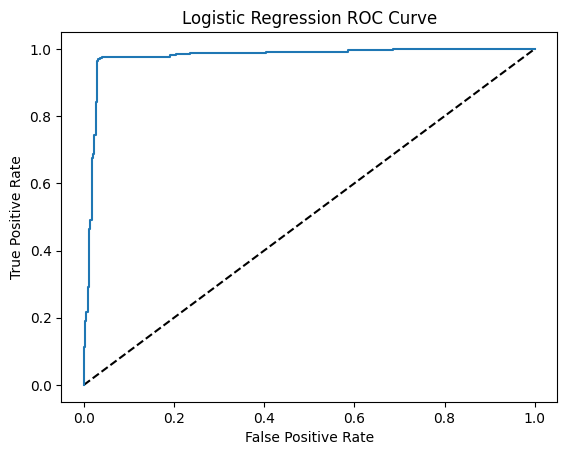

0.9761531291913889


In [51]:
y_pred_probs = logistig_model.predict_proba(X_test)[:, 1]
print(y_pred_probs[0])
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

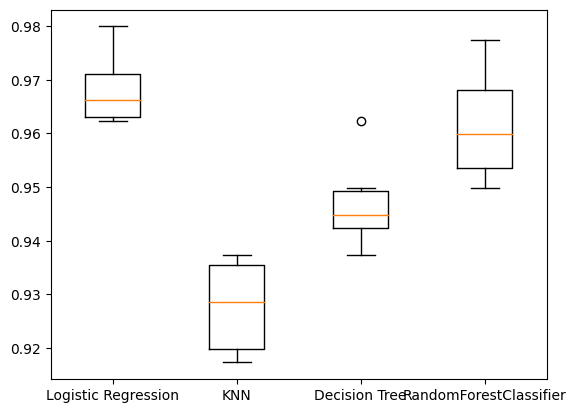

Logistic Regression Test Set Accuracy: 0.9682804674457429
KNN Test Set Accuracy: 0.9365609348914858
Decision Tree Test Set Accuracy: 0.9365609348914858
RandomForestClassifier Test Set Accuracy: 0.9616026711185309


In [52]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(),
"Decision Tree": DecisionTreeClassifier() , "RandomForestClassifier":RandomForestClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

for name, model in models.items():
    model.fit(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print("{} Test Set Accuracy: {}".format(name, test_score))

We used logistic regression while training our model. When choosing this, we determined that we should use supervised learning first because we had labeled in our project and we found that this was the best solution since it is the most reliable model according to the graph and accuracy results. Then, as a result of our research and experiments from supervised learning techniques, we found that using logistic regression was the most appropriate for our project since we are dealing with binary classification.

## References<a class="anchor" id="references"></a>

List all the sources you used during your work.
This includes jupyter notebooks you found on Internet.
Remeber, your work may not be an original one. However, this document must be genuine. Copy and paste kind of deliveries will be punished badly.


**Disclaimer!** <font color='grey'>This notebook was prepared by <student name(s)> as a term project for the *BBM467 - Data Intensive Applications* class. The notebook is available for educational purposes only. There is no guarantee on the correctness of the content provided as it is a student work.

If you think there is any copyright violation, please let us [know](https://forms.gle/BNNRB2kR8ZHVEREq8). 
</font>